### Data Shifting Experiment

### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/Data Fusion


In [2]:
import os
import numpy as np
import pandas as pd

from src.classifiers import preprocess_data, process_labels, split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion, train_late_fusion

from utils import normalize_embeddings, modify_and_normalize_embeddings, visualize_embeddings, plot_results, update_column_names

In [3]:
PATH = 'Embeddings/mimic/'
FILE = 'embeddings.csv'
DATASET = 'mimic'

batch_size = 32

output_size = 4
multilabel = False

num_epochs = 50

In [4]:
df = pd.read_csv(os.path.join(PATH, FILE))
df.disease_label = df.disease_label.astype(str)
df.head()

path  race_label  sex_label  \
0  p19/p19702416/s51321189/d85c9f15-f0f84927-761f...           0          0   
1  p13/p13339704/s51292704/0024603b-12db30e2-ab32...           2          0   
2  p13/p13339704/s51292704/7953848d-2411f0df-859f...           2          0   
3  p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...           0          0   
4  p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...           0          0   

  disease_label  subject_id  study_id  split  \
0             3    19702416  51321189  train   
1             3    13339704  51292704  train   
2             3    13339704  51292704  train   
3             3    12668169  54048859  train   
4             3    10309415  58144222  train   

                                          file_path    text_1    text_2  ...  \
0  datasets/mimic/files/p19/p19702416/s51321189.txt  0.019312 -0.016845  ...   
1  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
2  datasets/mimic/files/p13/p13339704/s51292704.txt  0.012198 -0.027218  ...   
3  datasets/mimic/files/p12/p12668169/s54048859.txt  0.023151 -0.003735  ...   
4  datasets/mimic/files/p10/p10309415/s58144222.txt  0.022132 -0.021821  ...   

   image_758  image_759  image_760  image_761  image_762  image_763  \
0  -1.977094   0.664772  -2.003561   0.063048   0.218469  -2.259382   
1  -2.502330  -0.262871  -2.777717   1.082299   1.273291  -1.900938   
2  -2.352660   0.049591  -2.599992   0.709397   0.635155  -2.035155   
3  -2.531913   0.778623  -3.406011   0.288661   1.660015  -2.785958   
4  -1.868888   0.562119  -1.824777   0.069089   1.093687  -1.628035   

   image_764  image_765  image_766  image_767  
0  -1.804749  -3.272988   1.671752  -2.163086  
1  -1.250531  -3.238538   1.466622  -3.243235  
2  -1.170720  -3.293882   1.306690  -2.955477  
3  -1.350666  -2.999661   2.809513  -3.075176  
4  -1.373444  -3.014874   1.524349  -2.403681  

[5 rows x 4872 columns]

In [5]:
# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column]
image_columns = [column for column in df.columns if 'image' in column]
label_columns = 'disease_label'

### Run Experiments

##################################################  Shift -1  ##################################################


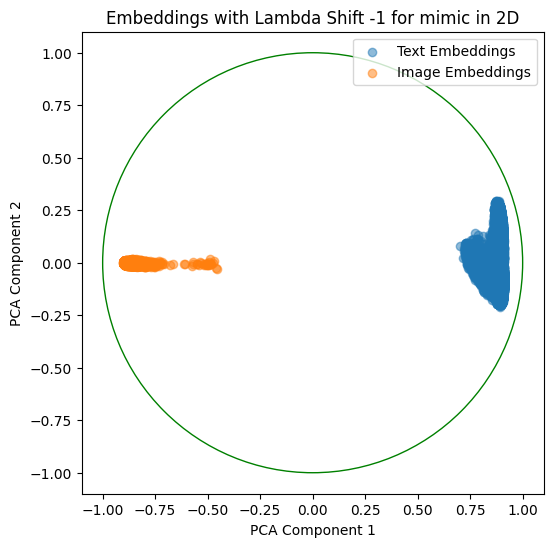

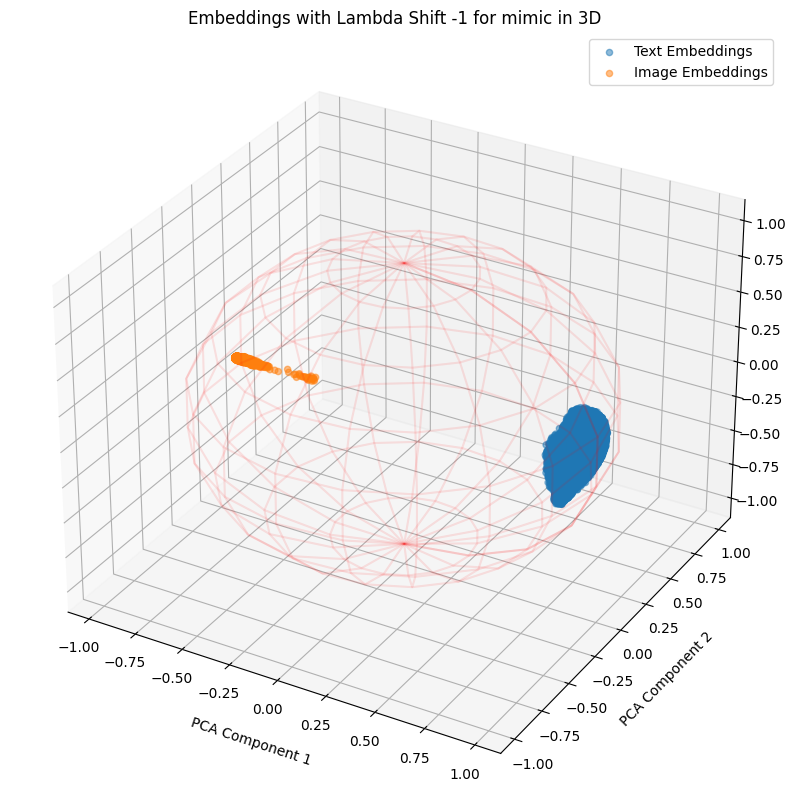

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 19.13 seconds
Total Training Time per Epoch: 956.53 seconds
Average Inference Time per Epoch: 2.74 seconds
Total Inference Time per Epoch: 136.89 seconds


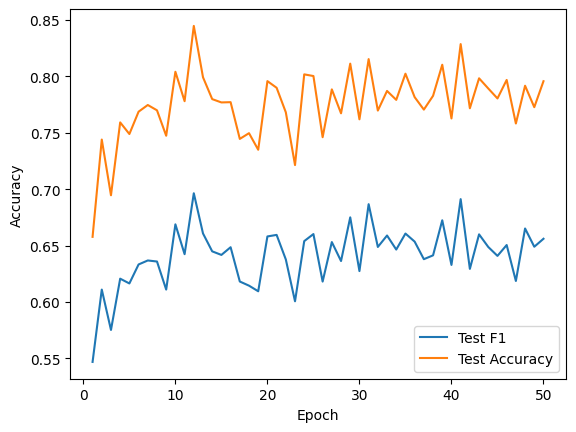

Best Accuracy: {'Acc': 0.8446640316205534, 'F1': 0.6964124832838878, 'Epoch': 12}
Best Macro-F1: {'Acc': 0.8446640316205534, 'F1': 0.6964124832838878, 'Epoch': 12}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.34 seconds
Total Training Time per Epoch: 867.01 seconds
Average Inference Time per Epoch: 2.74 seconds
Total Inference Time per Epoch: 136.89 seconds


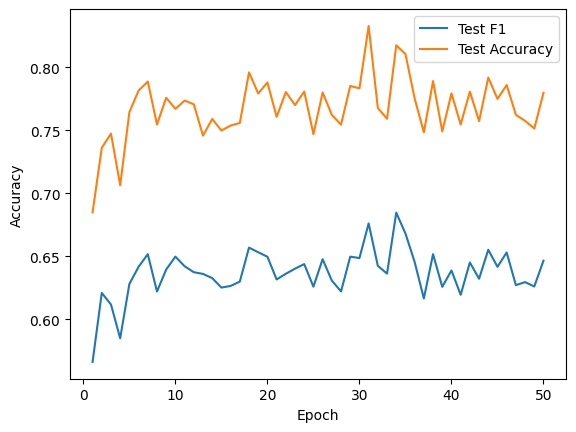

Best Accuracy: {'Acc': 0.8328392621870883, 'F1': 0.6760297512878429, 'Epoch': 31}
Best Macro-F1: {'Acc': 0.8174571805006587, 'F1': 0.6845661700338714, 'Epoch': 34}
##################################################  Shift -0.9  ##################################################


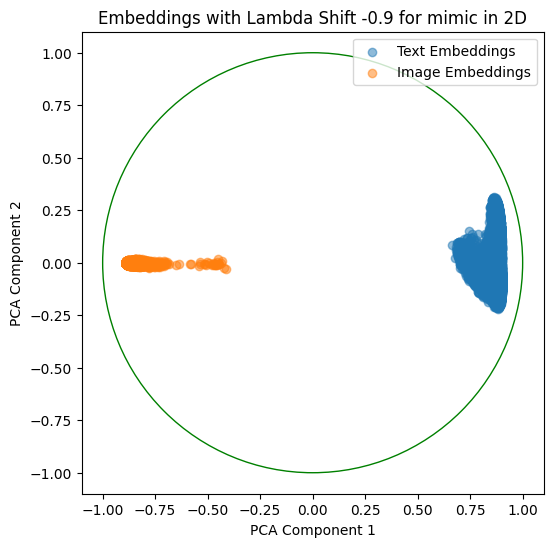

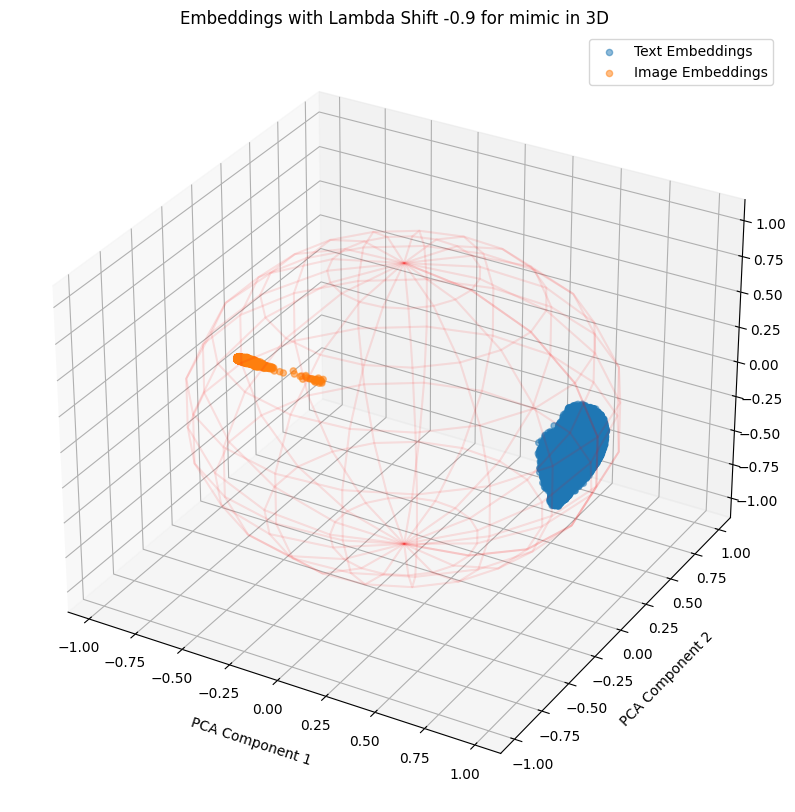

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.04 seconds
Total Training Time per Epoch: 1052.06 seconds
Average Inference Time per Epoch: 3.38 seconds
Total Inference Time per Epoch: 168.77 seconds


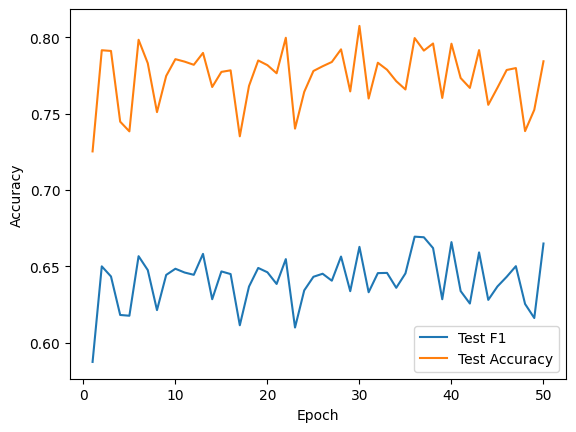

Best Accuracy: {'Acc': 0.8073451910408432, 'F1': 0.6628384996357387, 'Epoch': 30}
Best Macro-F1: {'Acc': 0.799407114624506, 'F1': 0.6695039965142514, 'Epoch': 36}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.58 seconds
Total Training Time per Epoch: 928.81 seconds
Average Inference Time per Epoch: 3.37 seconds
Total Inference Time per Epoch: 168.58 seconds


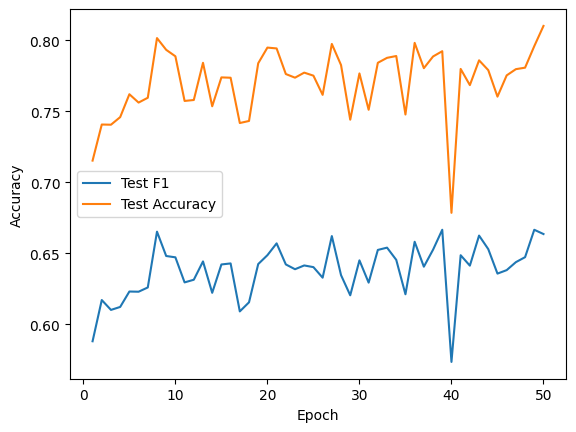

Best Accuracy: {'Acc': 0.8101449275362319, 'F1': 0.6636638586638655, 'Epoch': 50}
Best Macro-F1: {'Acc': 0.7923583662714098, 'F1': 0.6666826411704067, 'Epoch': 39}
##################################################  Shift -0.8  ##################################################


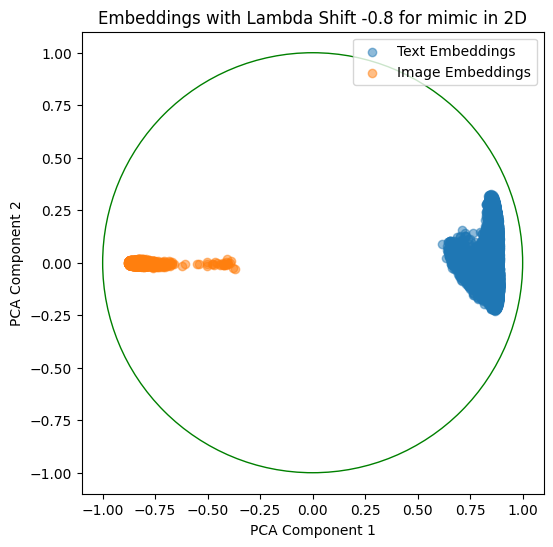

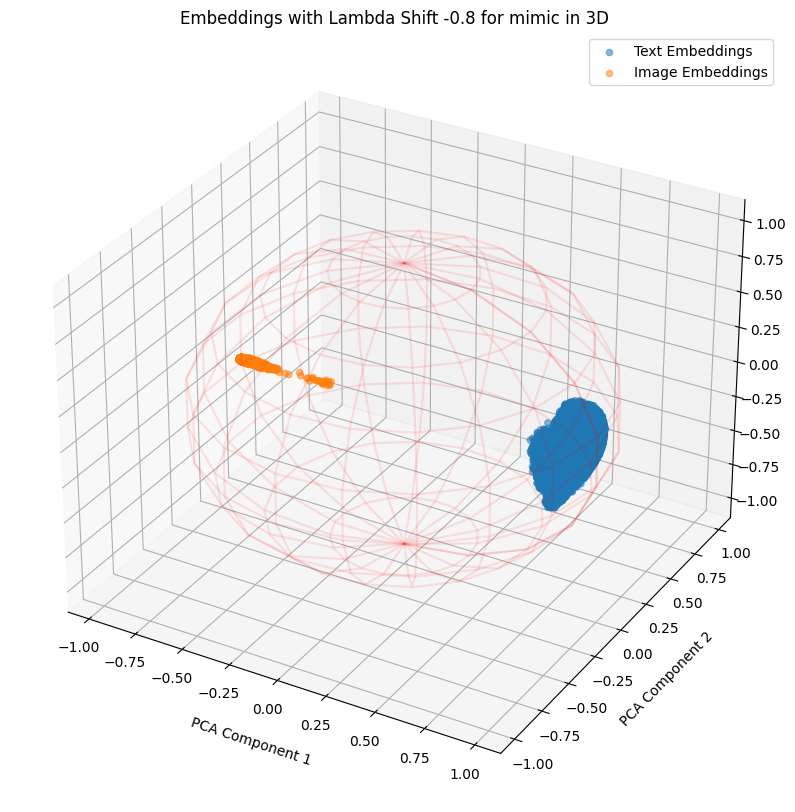

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.76 seconds
Total Training Time per Epoch: 1088.20 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 172.98 seconds


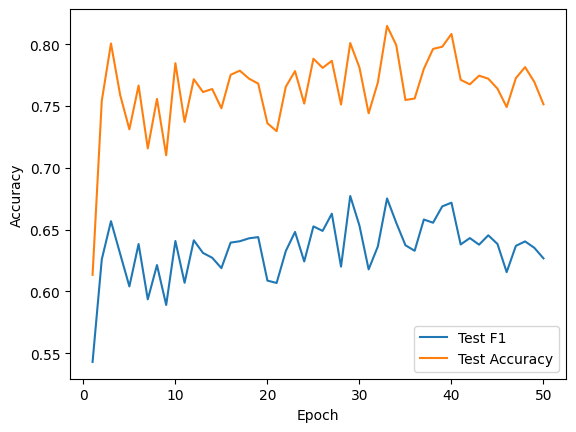

Best Accuracy: {'Acc': 0.8148550724637681, 'F1': 0.6752587708660811, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.8010210803689064, 'F1': 0.6772423365124804, 'Epoch': 29}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.40 seconds
Total Training Time per Epoch: 920.06 seconds
Average Inference Time per Epoch: 3.50 seconds
Total Inference Time per Epoch: 175.08 seconds


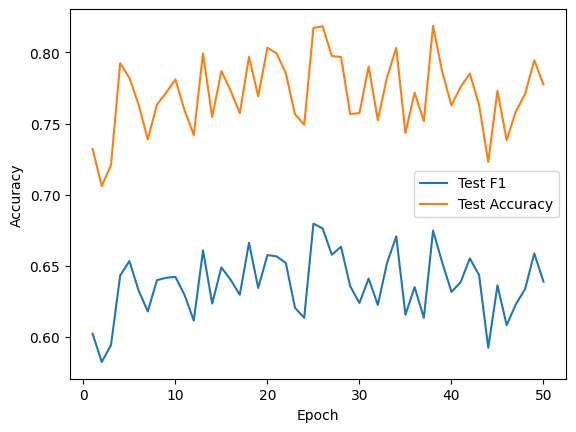

Best Accuracy: {'Acc': 0.8186100131752305, 'F1': 0.6747872285557296, 'Epoch': 38}
Best Macro-F1: {'Acc': 0.8171607378129118, 'F1': 0.6796649297318927, 'Epoch': 25}
##################################################  Shift -0.7  ##################################################


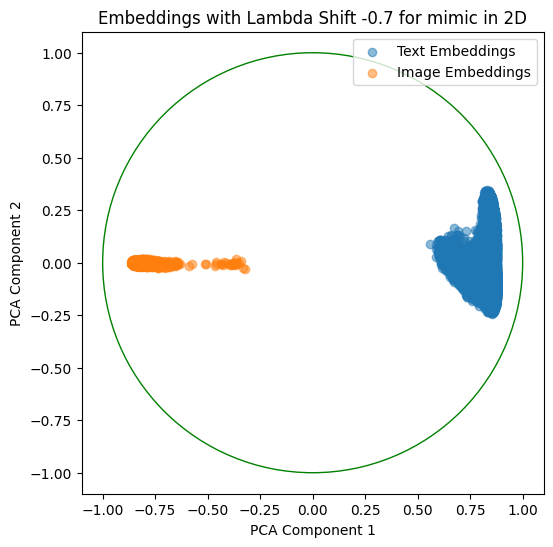

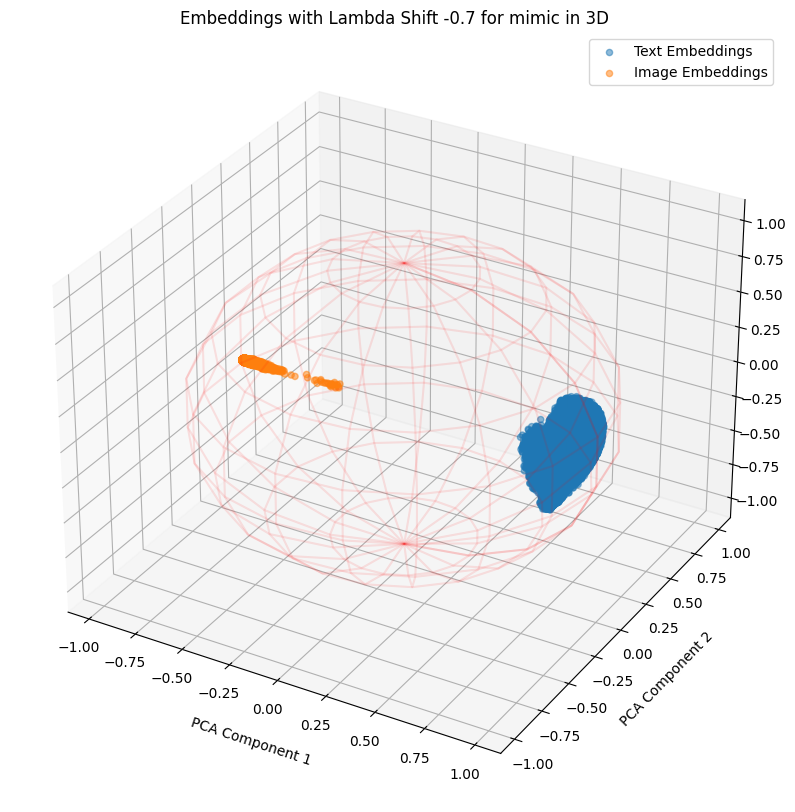

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.12 seconds
Total Training Time per Epoch: 1006.23 seconds
Average Inference Time per Epoch: 3.40 seconds
Total Inference Time per Epoch: 170.03 seconds


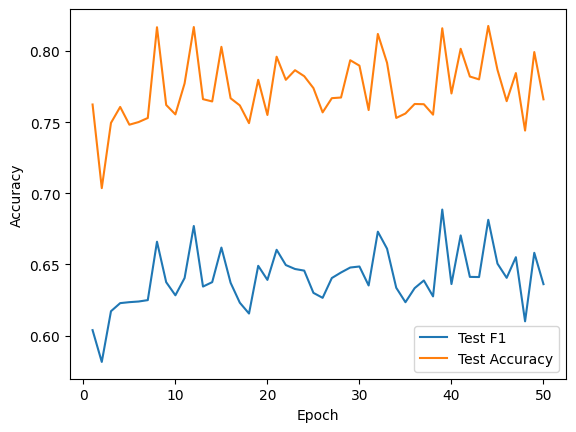

Best Accuracy: {'Acc': 0.8176548089591568, 'F1': 0.6813703793128365, 'Epoch': 44}
Best Macro-F1: {'Acc': 0.8160079051383399, 'F1': 0.6885554153734824, 'Epoch': 39}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.03 seconds
Total Training Time per Epoch: 901.63 seconds
Average Inference Time per Epoch: 3.40 seconds
Total Inference Time per Epoch: 169.84 seconds


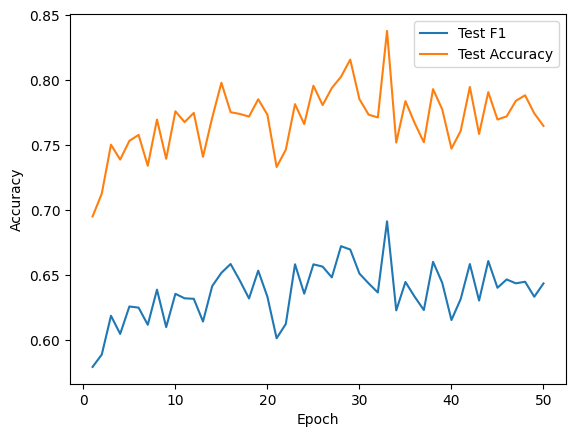

Best Accuracy: {'Acc': 0.8378458498023715, 'F1': 0.6912264179005762, 'Epoch': 33}
Best Macro-F1: {'Acc': 0.8378458498023715, 'F1': 0.6912264179005762, 'Epoch': 33}
##################################################  Shift -0.6  ##################################################


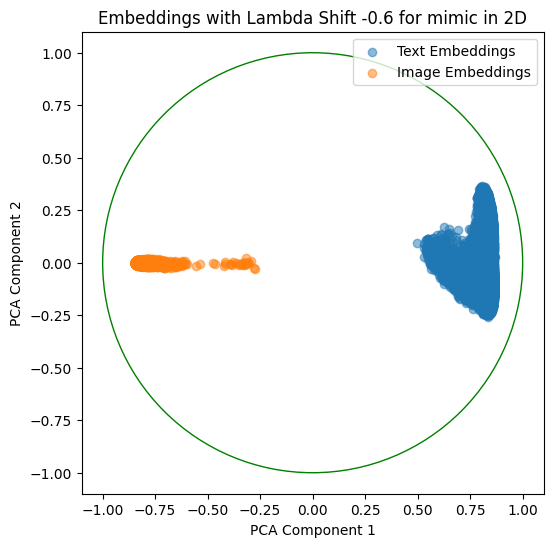

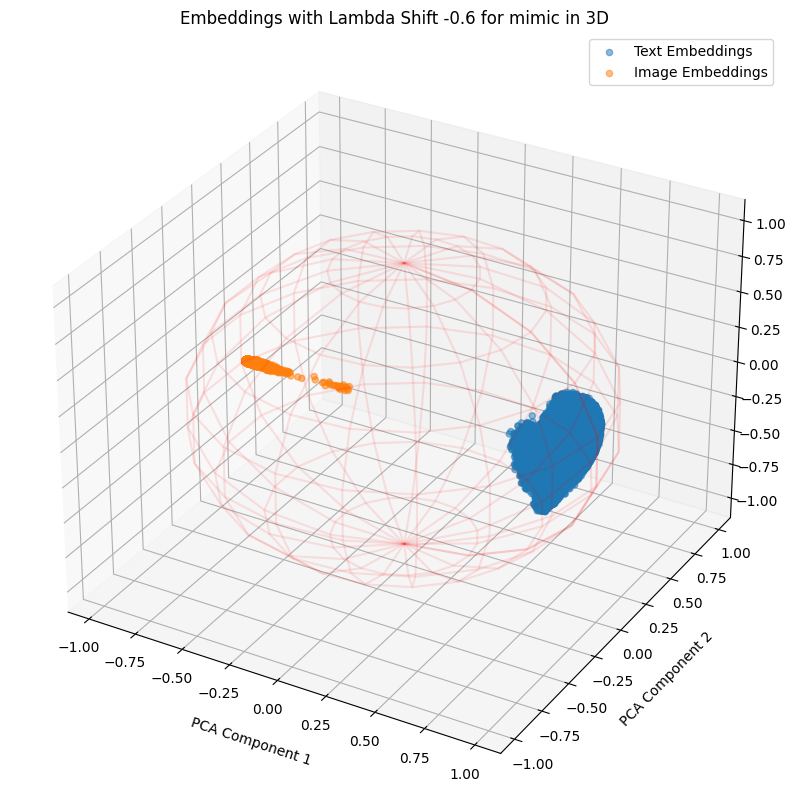

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.55 seconds
Total Training Time per Epoch: 1027.72 seconds
Average Inference Time per Epoch: 3.45 seconds
Total Inference Time per Epoch: 172.45 seconds


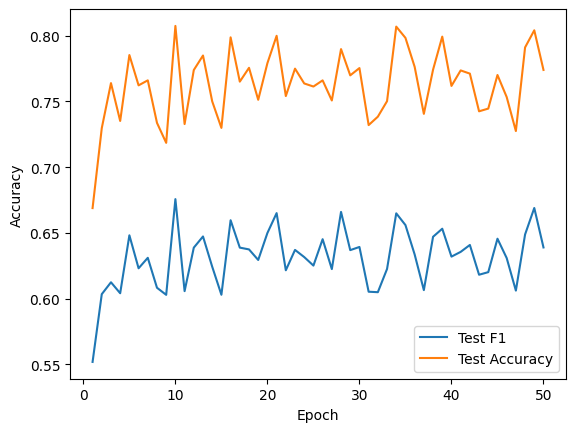

Best Accuracy: {'Acc': 0.8074110671936758, 'F1': 0.675730340103091, 'Epoch': 10}
Best Macro-F1: {'Acc': 0.8074110671936758, 'F1': 0.675730340103091, 'Epoch': 10}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.86 seconds
Total Training Time per Epoch: 892.89 seconds
Average Inference Time per Epoch: 3.44 seconds
Total Inference Time per Epoch: 172.20 seconds


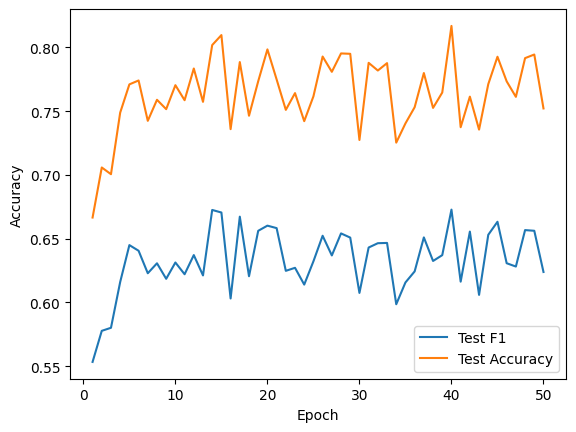

Best Accuracy: {'Acc': 0.816897233201581, 'F1': 0.6728085227628549, 'Epoch': 40}
Best Macro-F1: {'Acc': 0.816897233201581, 'F1': 0.6728085227628549, 'Epoch': 40}
##################################################  Shift -0.5  ##################################################


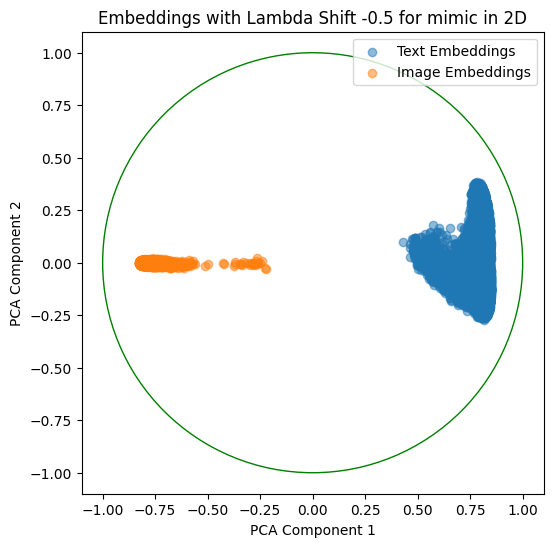

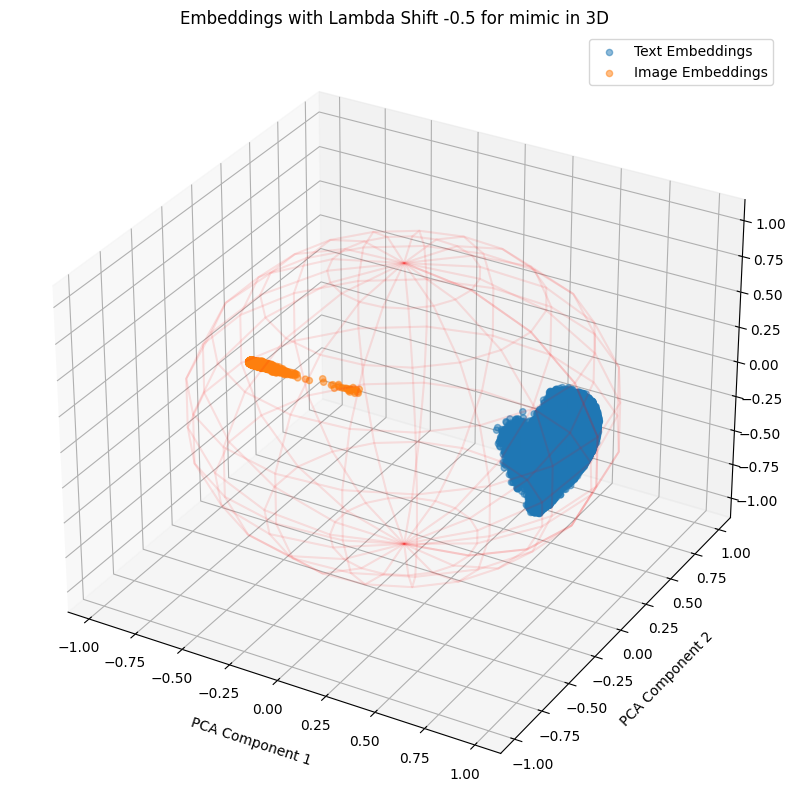

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.96 seconds
Total Training Time per Epoch: 1097.90 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 172.93 seconds


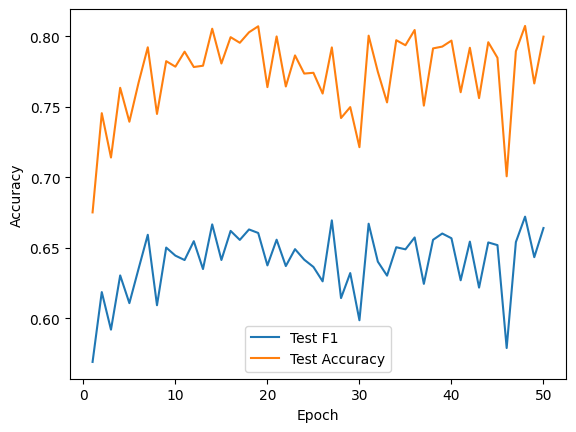

Best Accuracy: {'Acc': 0.8074110671936758, 'F1': 0.6721368936482663, 'Epoch': 48}
Best Macro-F1: {'Acc': 0.8074110671936758, 'F1': 0.6721368936482663, 'Epoch': 48}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.70 seconds
Total Training Time per Epoch: 934.78 seconds
Average Inference Time per Epoch: 3.45 seconds
Total Inference Time per Epoch: 172.32 seconds


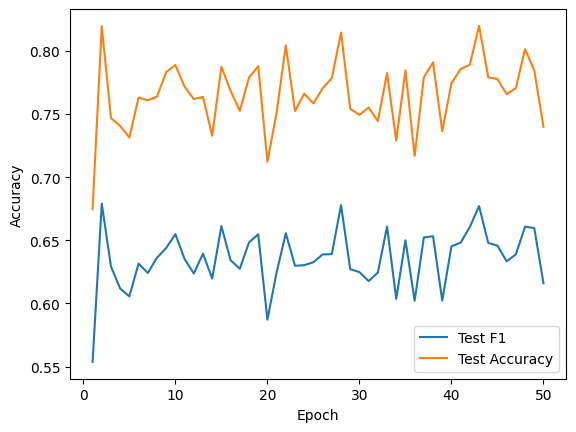

Best Accuracy: {'Acc': 0.8197299077733861, 'F1': 0.677080471490287, 'Epoch': 43}
Best Macro-F1: {'Acc': 0.819532279314888, 'F1': 0.6789989128700816, 'Epoch': 2}
##################################################  Shift -0.4  ##################################################


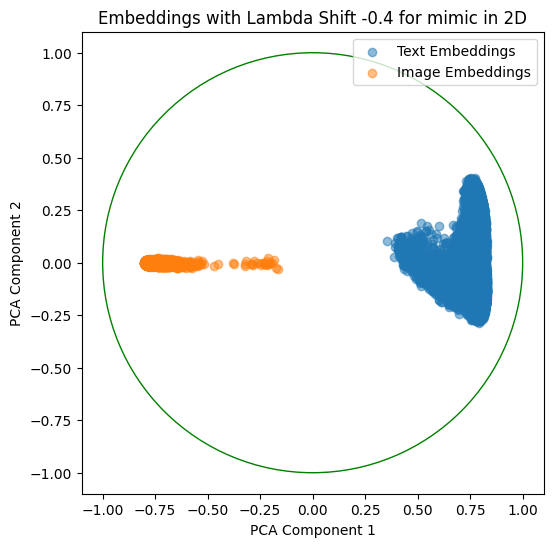

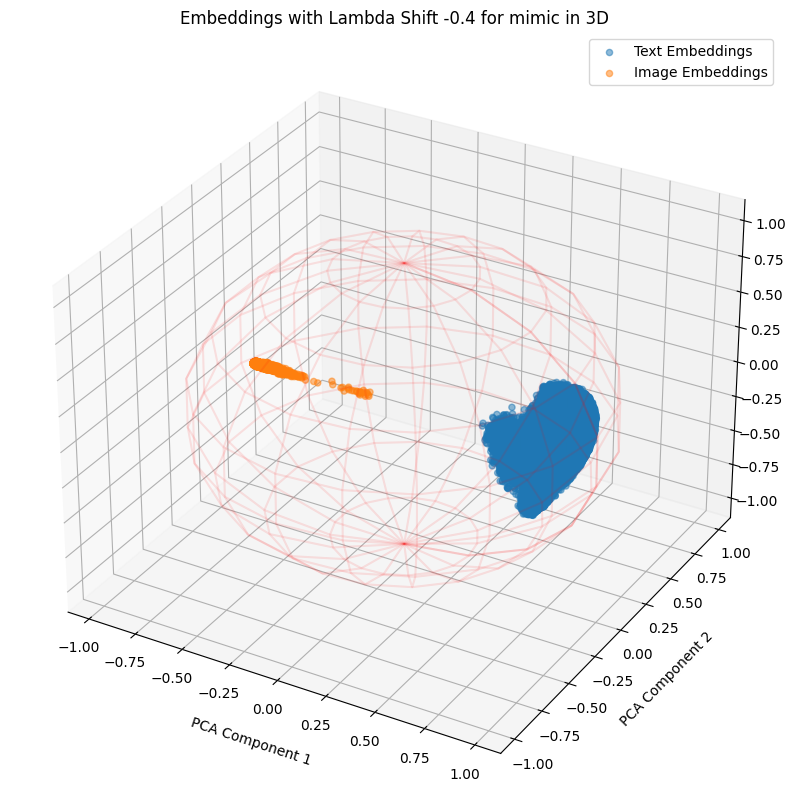

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.94 seconds
Total Training Time per Epoch: 1047.10 seconds
Average Inference Time per Epoch: 3.51 seconds
Total Inference Time per Epoch: 175.28 seconds


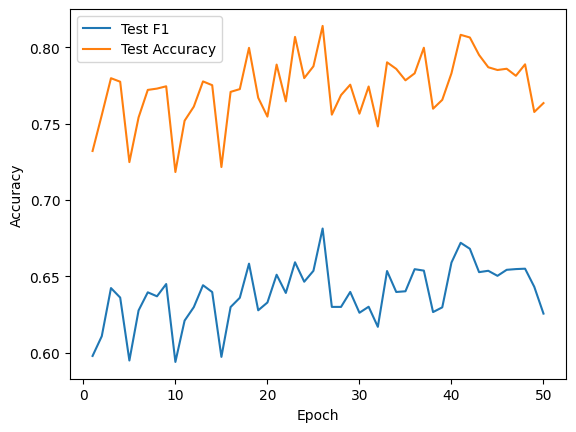

Best Accuracy: {'Acc': 0.8140974967061924, 'F1': 0.6813321726355597, 'Epoch': 26}
Best Macro-F1: {'Acc': 0.8140974967061924, 'F1': 0.6813321726355597, 'Epoch': 26}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.95 seconds
Total Training Time per Epoch: 897.64 seconds
Average Inference Time per Epoch: 3.47 seconds
Total Inference Time per Epoch: 173.68 seconds


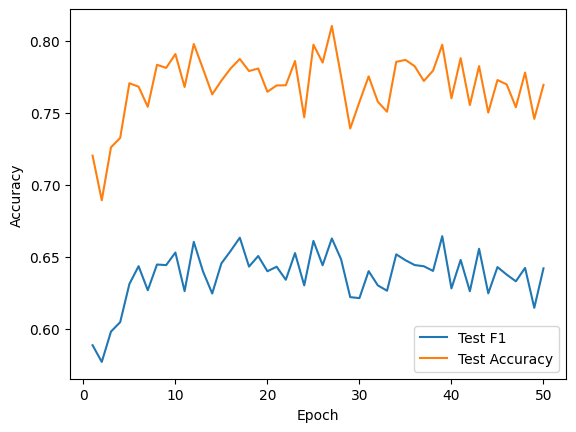

Best Accuracy: {'Acc': 0.8101449275362319, 'F1': 0.662629261121359, 'Epoch': 27}
Best Macro-F1: {'Acc': 0.7971014492753623, 'F1': 0.6642336525871645, 'Epoch': 39}
##################################################  Shift -0.3  ##################################################


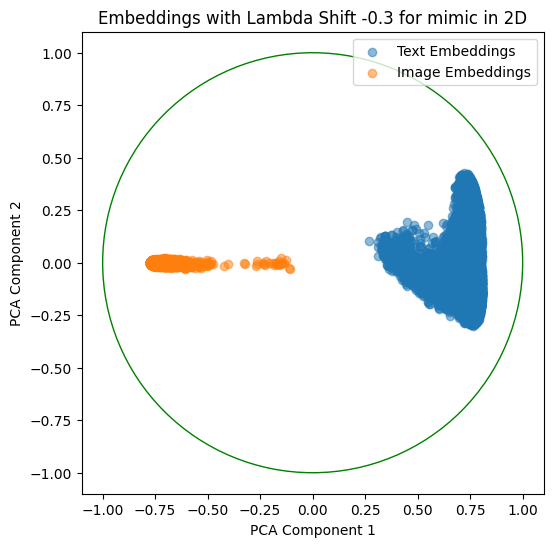

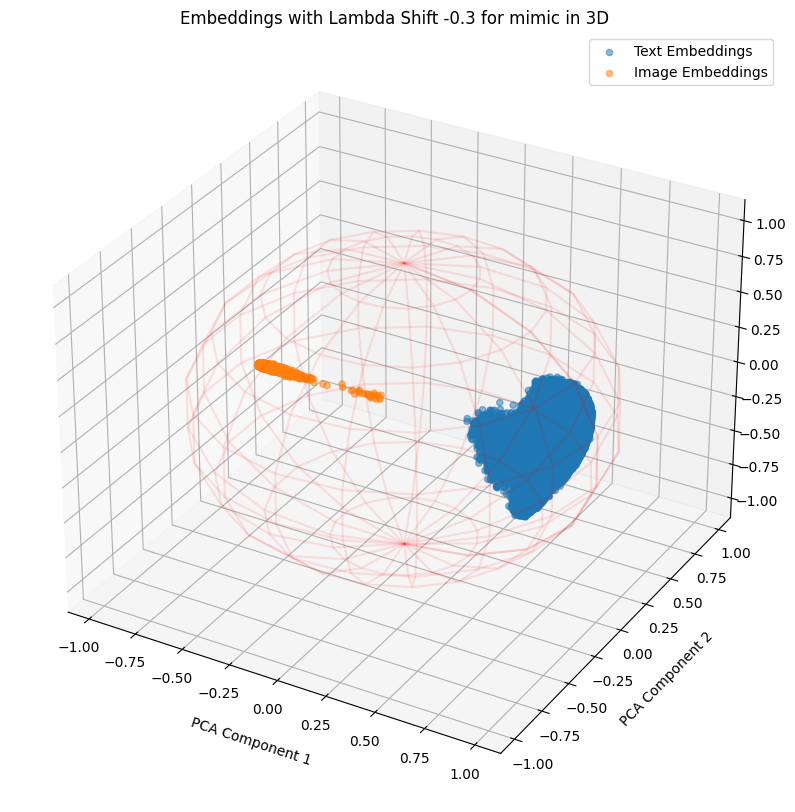

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.68 seconds
Total Training Time per Epoch: 1033.85 seconds
Average Inference Time per Epoch: 3.49 seconds
Total Inference Time per Epoch: 174.47 seconds


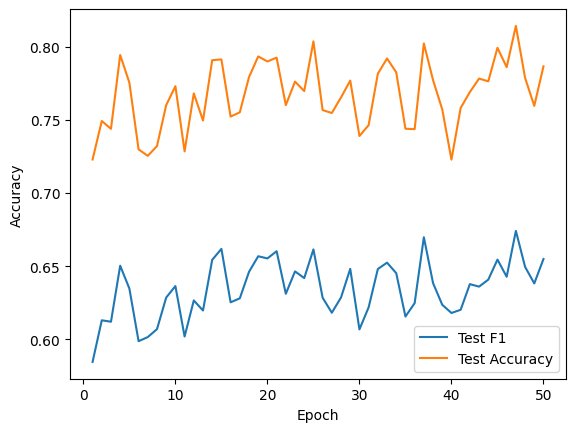

Best Accuracy: {'Acc': 0.8140974967061924, 'F1': 0.6741502375773931, 'Epoch': 47}
Best Macro-F1: {'Acc': 0.8140974967061924, 'F1': 0.6741502375773931, 'Epoch': 47}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.88 seconds
Total Training Time per Epoch: 893.81 seconds
Average Inference Time per Epoch: 3.49 seconds
Total Inference Time per Epoch: 174.52 seconds


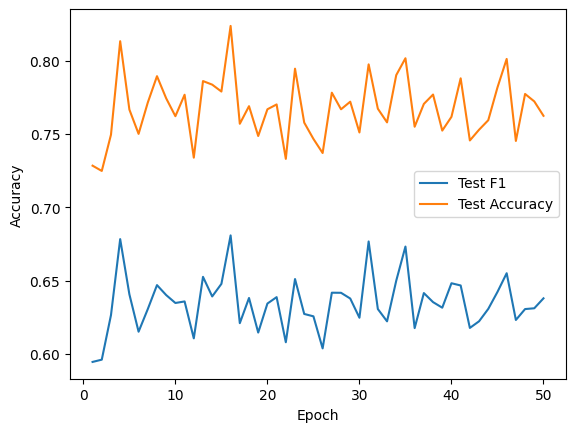

Best Accuracy: {'Acc': 0.8236166007905138, 'F1': 0.6808364900929347, 'Epoch': 16}
Best Macro-F1: {'Acc': 0.8236166007905138, 'F1': 0.6808364900929347, 'Epoch': 16}
##################################################  Shift -0.2  ##################################################


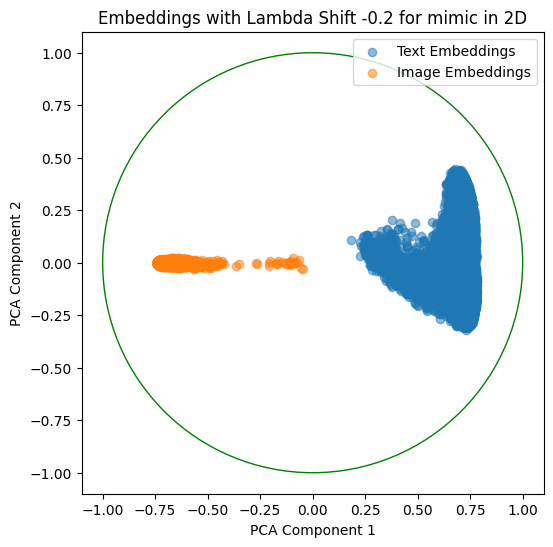

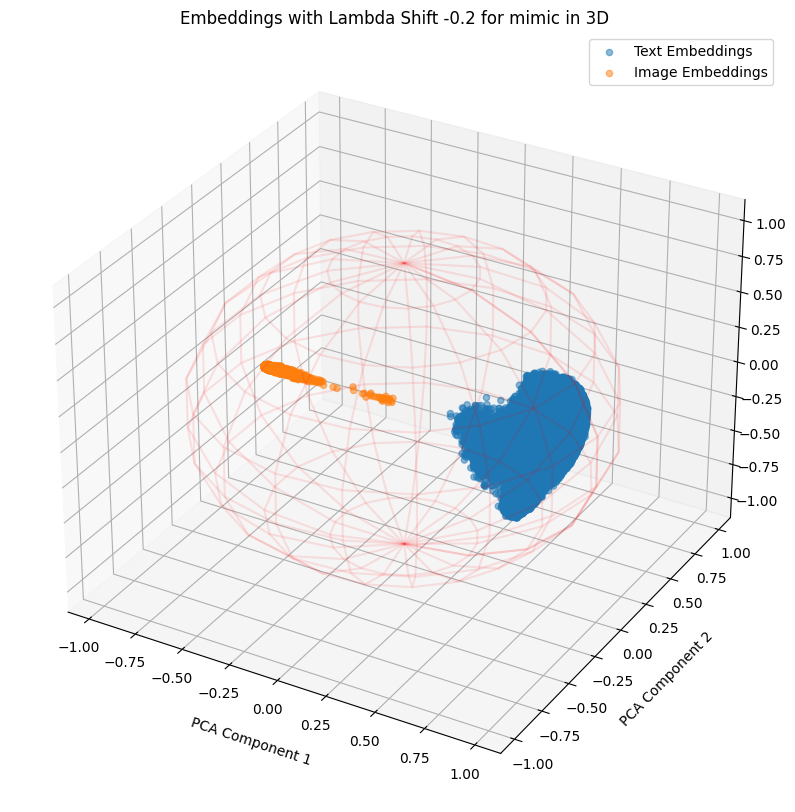

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.44 seconds
Total Training Time per Epoch: 1071.77 seconds
Average Inference Time per Epoch: 3.50 seconds
Total Inference Time per Epoch: 174.93 seconds


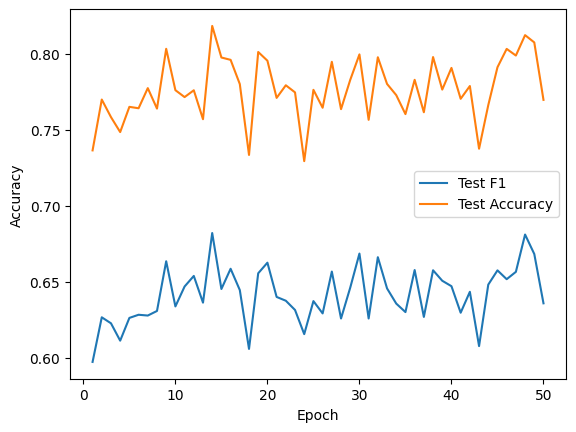

Best Accuracy: {'Acc': 0.8182476943346508, 'F1': 0.6819314761151141, 'Epoch': 14}
Best Macro-F1: {'Acc': 0.8182476943346508, 'F1': 0.6819314761151141, 'Epoch': 14}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.84 seconds
Total Training Time per Epoch: 942.16 seconds
Average Inference Time per Epoch: 3.50 seconds
Total Inference Time per Epoch: 174.82 seconds


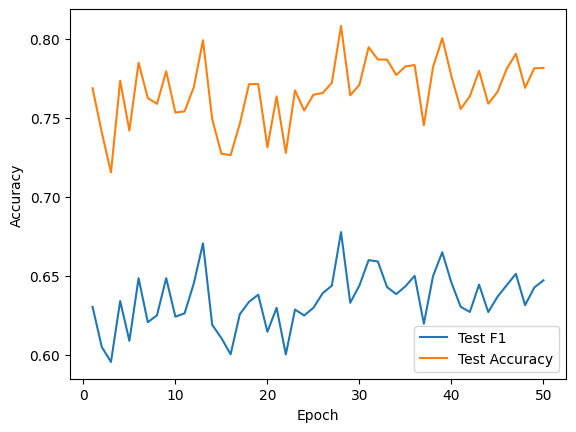

Best Accuracy: {'Acc': 0.8082345191040843, 'F1': 0.6776958894759058, 'Epoch': 28}
Best Macro-F1: {'Acc': 0.8082345191040843, 'F1': 0.6776958894759058, 'Epoch': 28}
##################################################  Shift -0.1  ##################################################


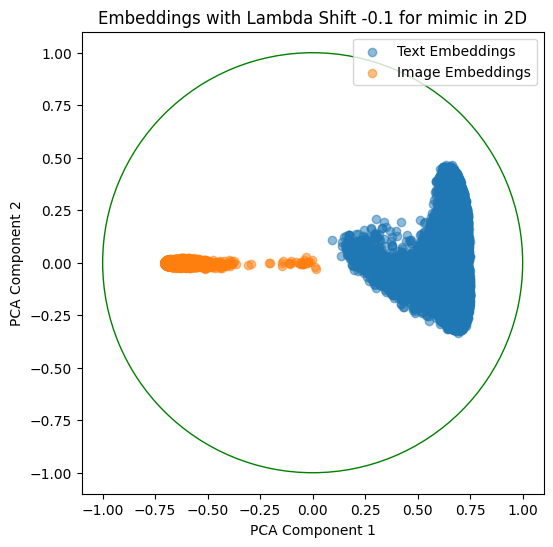

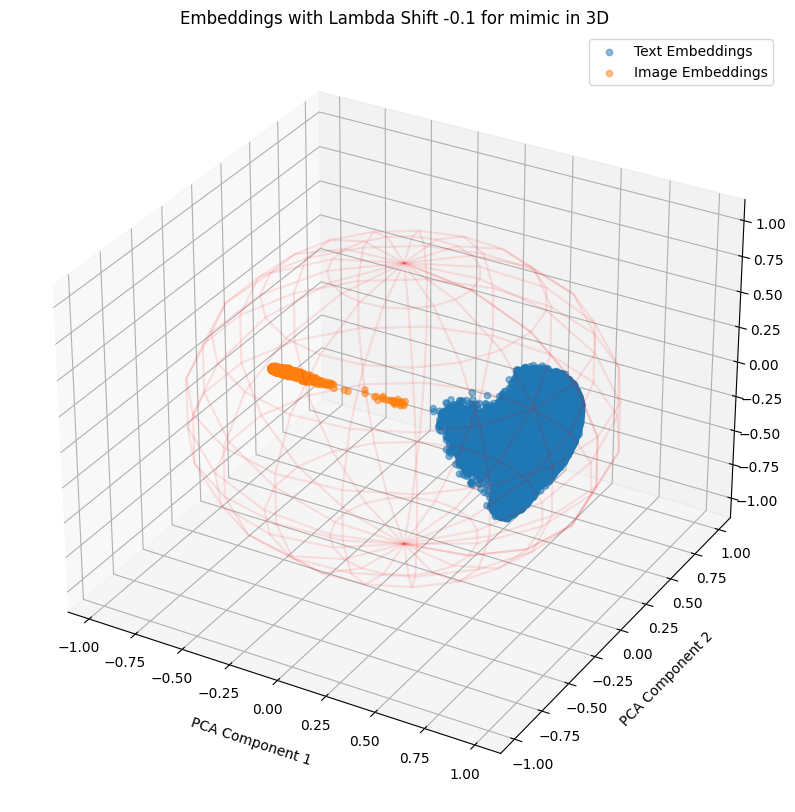

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.49 seconds
Total Training Time per Epoch: 1024.56 seconds
Average Inference Time per Epoch: 3.48 seconds
Total Inference Time per Epoch: 174.21 seconds


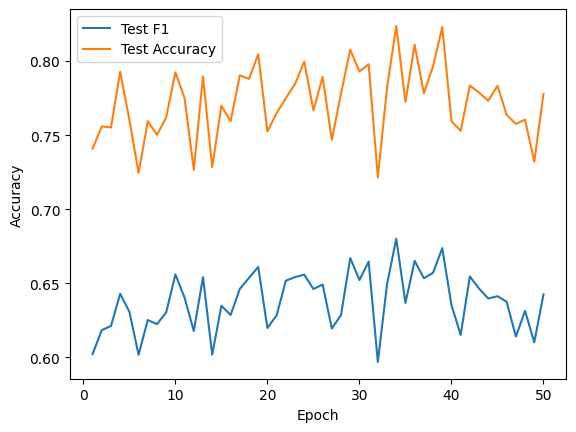

Best Accuracy: {'Acc': 0.8237483530961792, 'F1': 0.6801116946654092, 'Epoch': 34}
Best Macro-F1: {'Acc': 0.8237483530961792, 'F1': 0.6801116946654092, 'Epoch': 34}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.67 seconds
Total Training Time per Epoch: 883.48 seconds
Average Inference Time per Epoch: 3.49 seconds
Total Inference Time per Epoch: 174.30 seconds


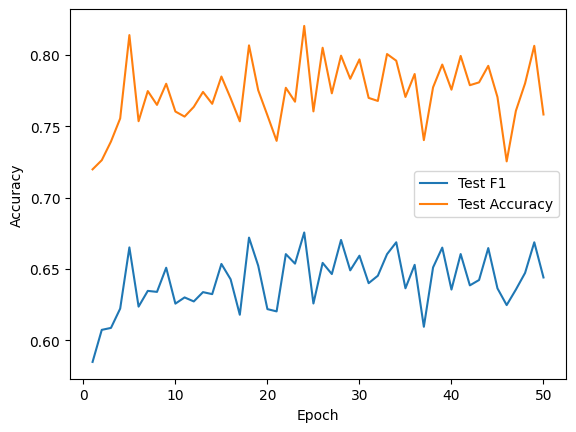

Best Accuracy: {'Acc': 0.8202898550724638, 'F1': 0.6755660840028586, 'Epoch': 24}
Best Macro-F1: {'Acc': 0.8202898550724638, 'F1': 0.6755660840028586, 'Epoch': 24}
##################################################  Shift 0  ##################################################


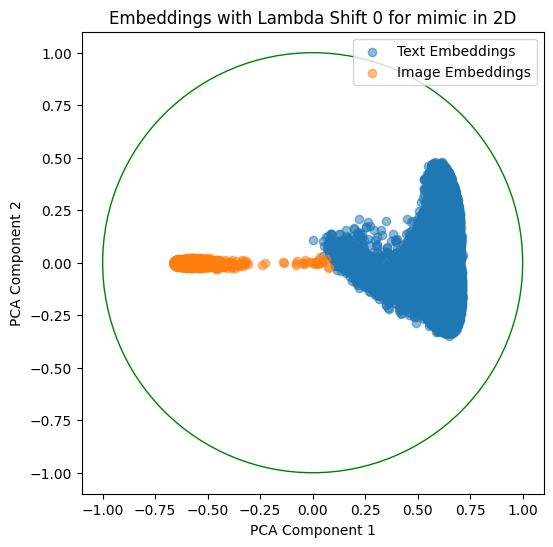

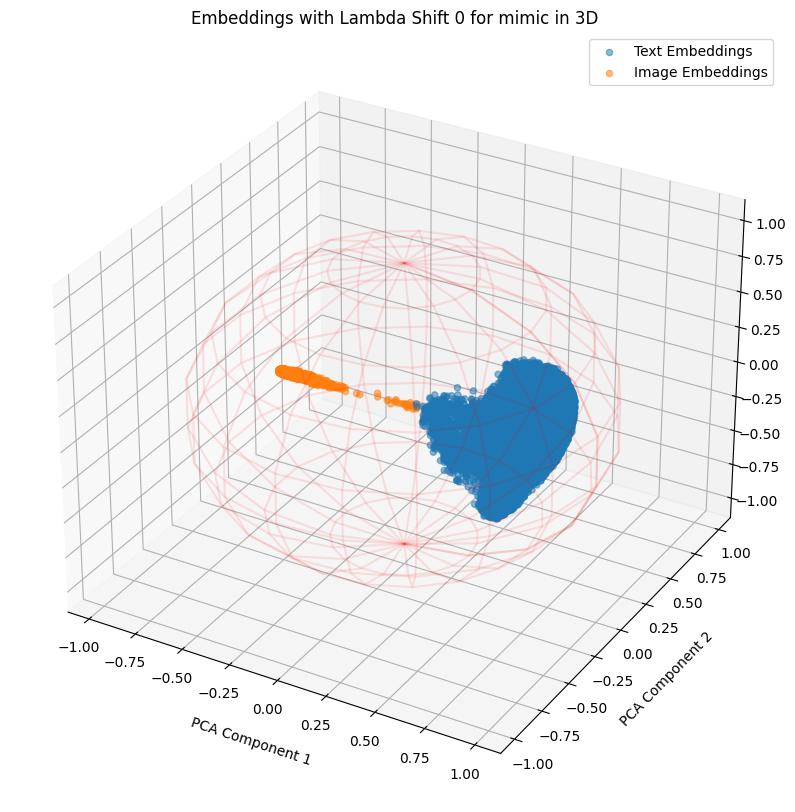

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.95 seconds
Total Training Time per Epoch: 1097.59 seconds
Average Inference Time per Epoch: 3.48 seconds
Total Inference Time per Epoch: 173.89 seconds


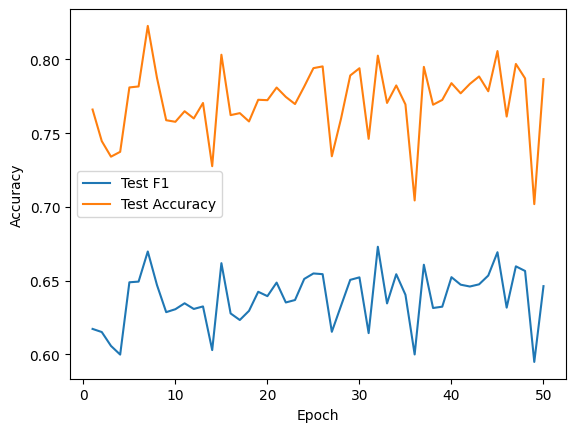

Best Accuracy: {'Acc': 0.8227272727272728, 'F1': 0.6698045057708936, 'Epoch': 7}
Best Macro-F1: {'Acc': 0.8025691699604743, 'F1': 0.6730185228057998, 'Epoch': 32}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.34 seconds
Total Training Time per Epoch: 916.97 seconds
Average Inference Time per Epoch: 3.50 seconds
Total Inference Time per Epoch: 175.18 seconds


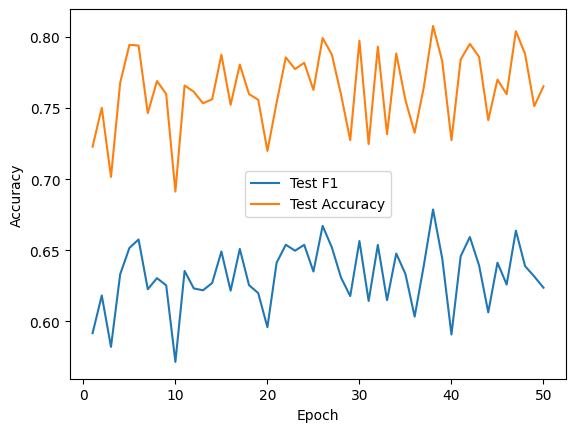

Best Accuracy: {'Acc': 0.8077404479578393, 'F1': 0.6786611292379923, 'Epoch': 38}
Best Macro-F1: {'Acc': 0.8077404479578393, 'F1': 0.6786611292379923, 'Epoch': 38}
##################################################  Shift 0.1  ##################################################


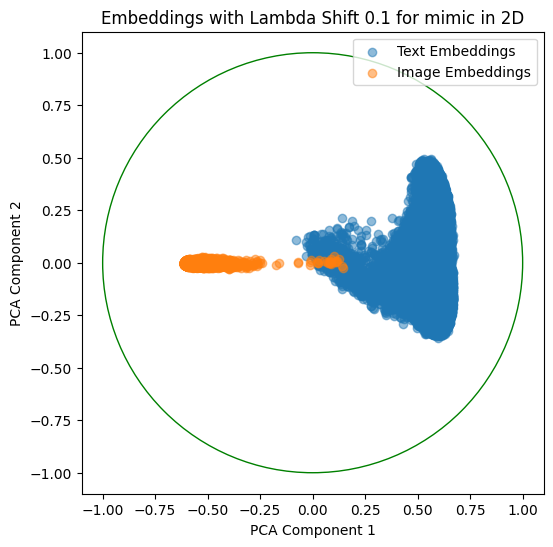

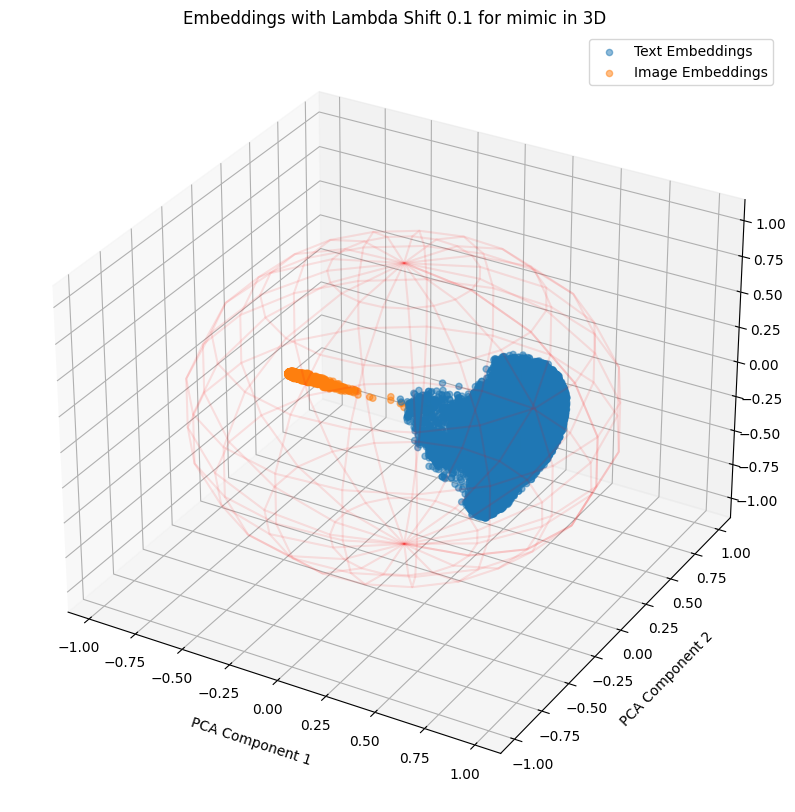

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 20.75 seconds
Total Training Time per Epoch: 1037.26 seconds
Average Inference Time per Epoch: 3.46 seconds
Total Inference Time per Epoch: 172.93 seconds


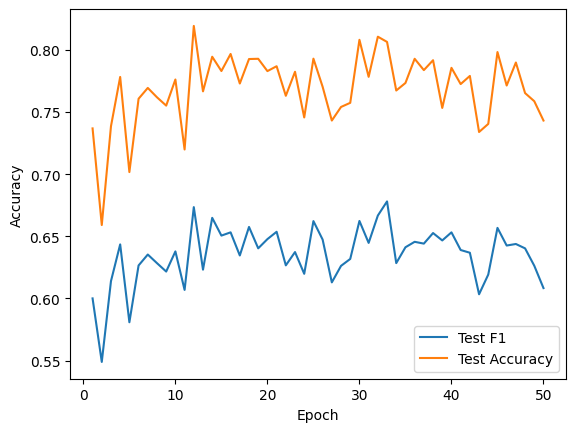

Best Accuracy: {'Acc': 0.8193675889328064, 'F1': 0.6735305517746928, 'Epoch': 12}
Best Macro-F1: {'Acc': 0.8064888010540184, 'F1': 0.6781360791208281, 'Epoch': 33}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.37 seconds
Total Training Time per Epoch: 868.75 seconds
Average Inference Time per Epoch: 3.49 seconds
Total Inference Time per Epoch: 174.57 seconds


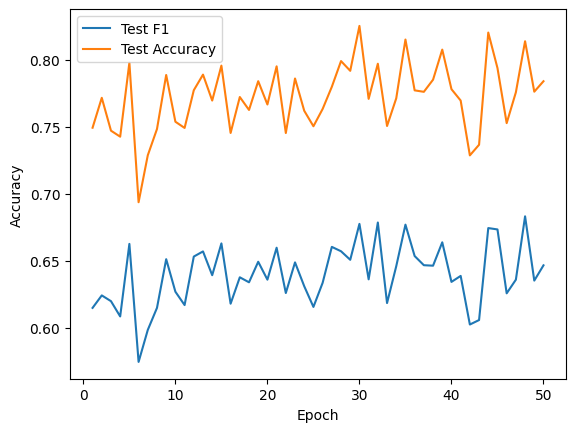

Best Accuracy: {'Acc': 0.8254940711462451, 'F1': 0.6776735377305658, 'Epoch': 30}
Best Macro-F1: {'Acc': 0.814064558629776, 'F1': 0.683300778929276, 'Epoch': 48}
##################################################  Shift 0.2  ##################################################


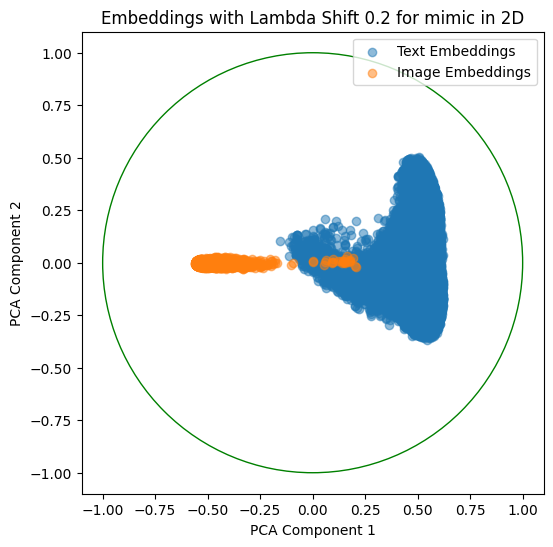

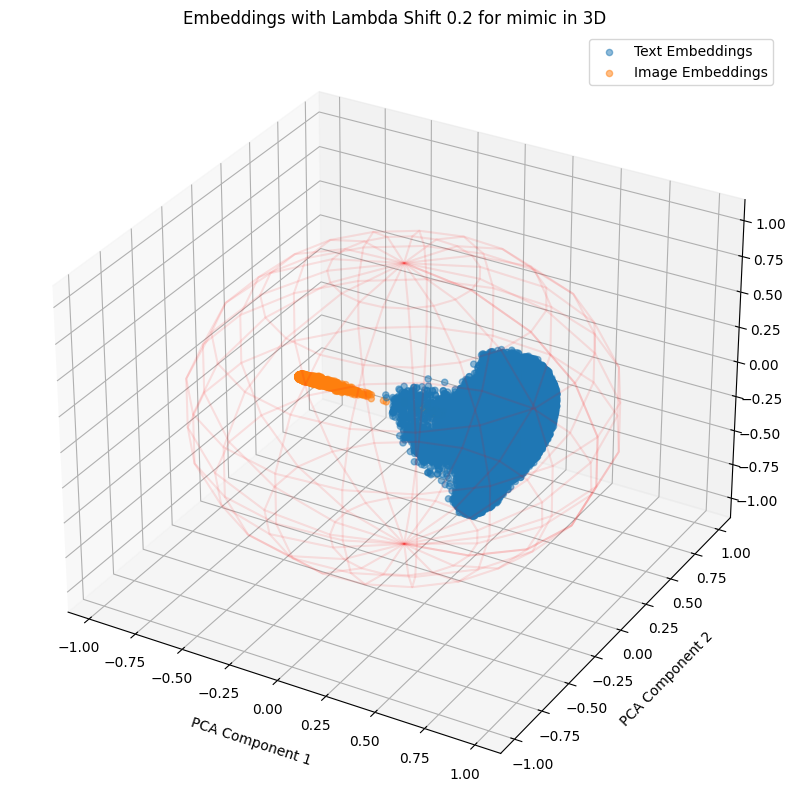

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 21.94 seconds
Total Training Time per Epoch: 1097.23 seconds
Average Inference Time per Epoch: 3.48 seconds
Total Inference Time per Epoch: 174.25 seconds


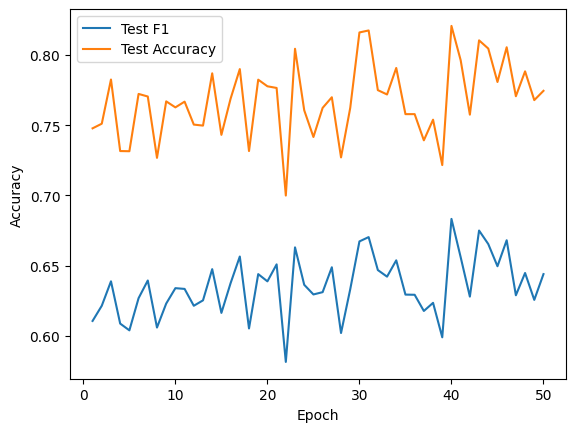

Best Accuracy: {'Acc': 0.8207180500658762, 'F1': 0.6832993994950955, 'Epoch': 40}
Best Macro-F1: {'Acc': 0.8207180500658762, 'F1': 0.6832993994950955, 'Epoch': 40}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 18.16 seconds
Total Training Time per Epoch: 908.07 seconds
Average Inference Time per Epoch: 3.48 seconds
Total Inference Time per Epoch: 174.04 seconds


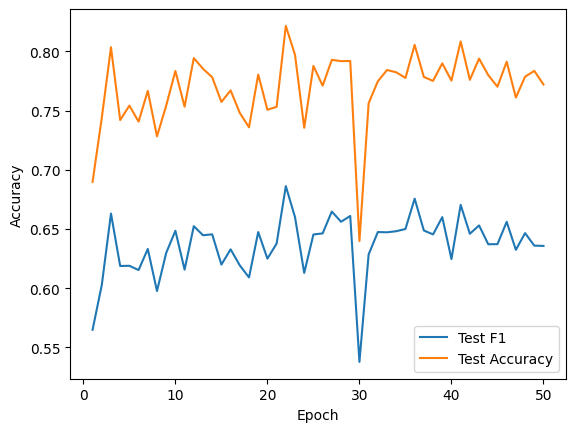

Best Accuracy: {'Acc': 0.821574440052701, 'F1': 0.6862173296962174, 'Epoch': 22}
Best Macro-F1: {'Acc': 0.821574440052701, 'F1': 0.6862173296962174, 'Epoch': 22}
##################################################  Shift 0.3  ##################################################


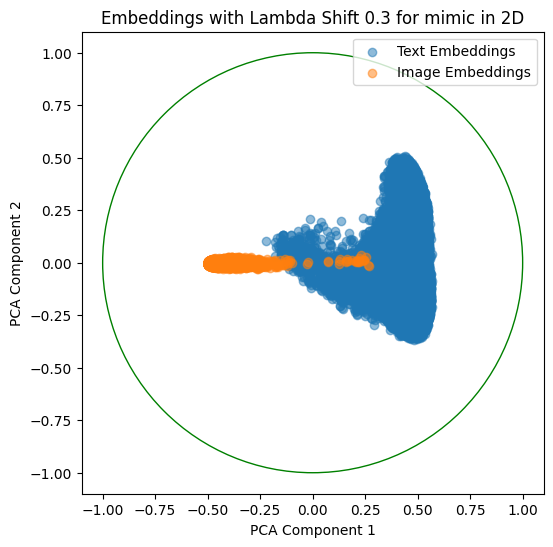

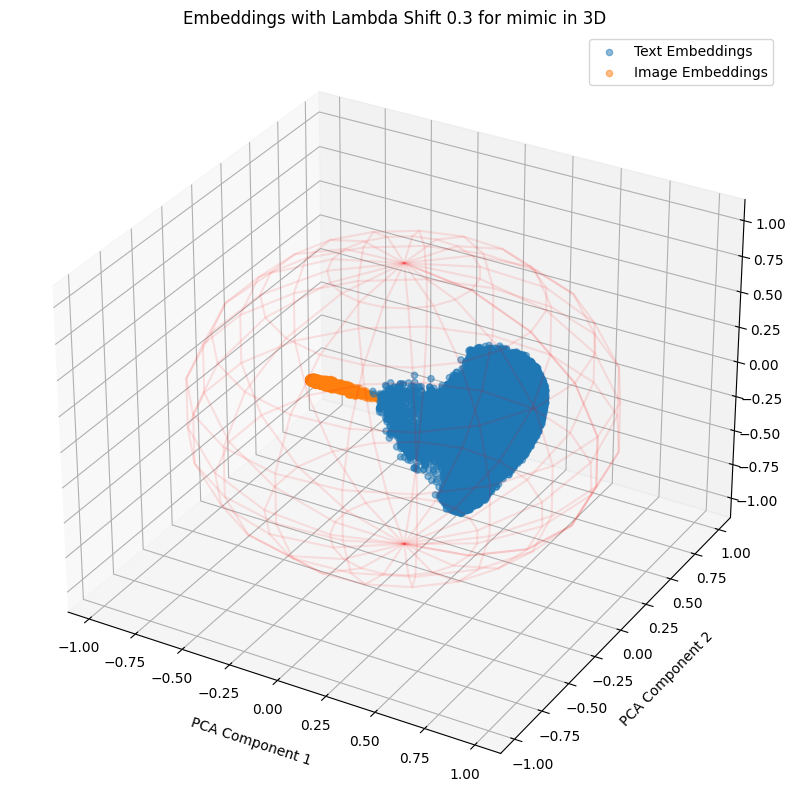

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 22.32 seconds
Total Training Time per Epoch: 1116.06 seconds
Average Inference Time per Epoch: 3.65 seconds
Total Inference Time per Epoch: 182.38 seconds


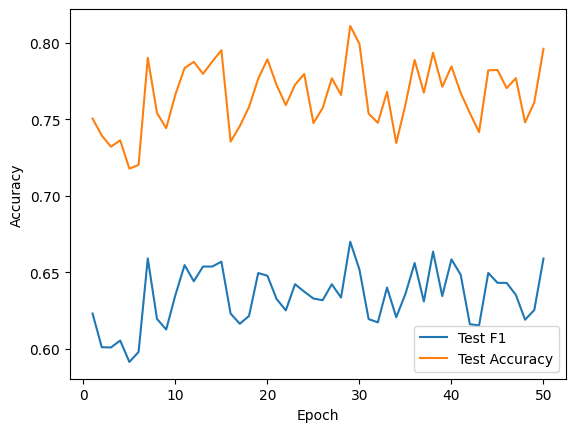

Best Accuracy: {'Acc': 0.811133069828722, 'F1': 0.6700902383367586, 'Epoch': 29}
Best Macro-F1: {'Acc': 0.811133069828722, 'F1': 0.6700902383367586, 'Epoch': 29}
Training Late Fusion Model:
The number of parameters of the model are: 312196
Average Training Time per Epoch: 17.87 seconds
Total Training Time per Epoch: 893.54 seconds
Average Inference Time per Epoch: 3.54 seconds
Total Inference Time per Epoch: 177.09 seconds


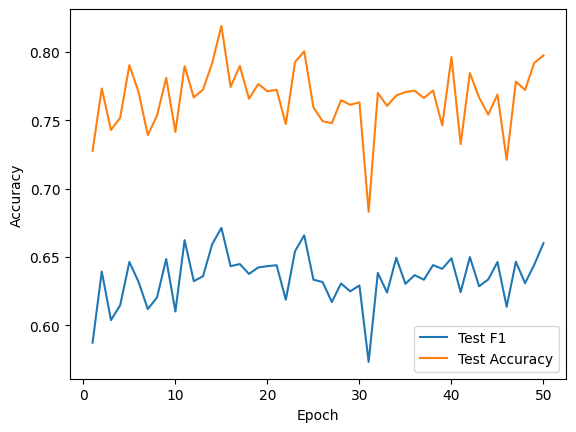

Best Accuracy: {'Acc': 0.818939393939394, 'F1': 0.6712719077296863, 'Epoch': 15}
Best Macro-F1: {'Acc': 0.818939393939394, 'F1': 0.6712719077296863, 'Epoch': 15}
##################################################  Shift 0.4  ##################################################


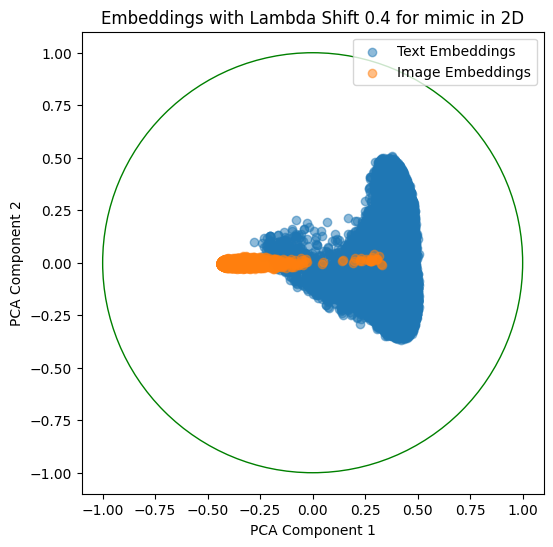

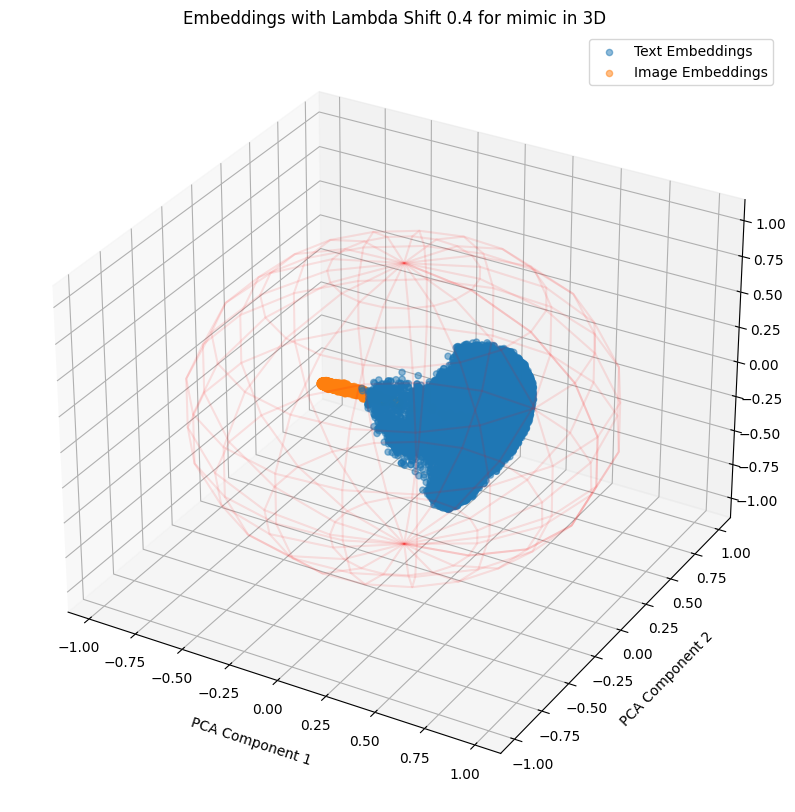

Train Shape: (107695, 8201)
Test Shape: (30360, 8201)
Training Early Fusion Model:
The number of parameters of the model are: 623492
Average Training Time per Epoch: 24.01 seconds
Total Training Time per Epoch: 1200.41 seconds
Average Inference Time per Epoch: 3.73 seconds
Total Inference Time per Epoch: 186.73 seconds


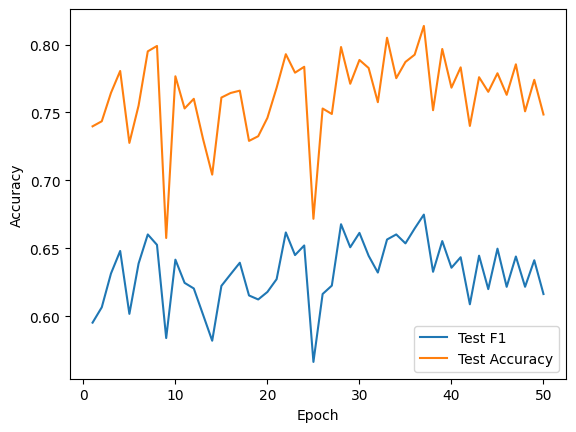

Best Accuracy: {'Acc': 0.8137351778656127, 'F1': 0.6748343735131881, 'Epoch': 37}
Best Macro-F1: {'Acc': 0.8137351778656127, 'F1': 0.6748343735131881, 'Epoch': 37}
Training Late Fusion Model:
The number of parameters of the model are: 312196



KeyboardInterrupt



In [6]:
# Assuming df is your DataFrame
lambda_shift_values = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # Negative values bring embeddings closer, positive values push them apart
#lambda_shift_values = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Negative values bring embeddings closer, positive values push them apart

# Normalize initial embeddings
df[text_columns] = normalize_embeddings(df[text_columns].values)
df[image_columns] = normalize_embeddings(df[image_columns].values)

# Dataframe with shifted values:
df_shifted = df.copy()

results = {}

for lambda_shift in lambda_shift_values:
    
    print('#'*50, f' Shift {lambda_shift} ', '#'*50)
    
    # Extract embeddings
    text_embeddings = df[text_columns].values
    image_embeddings = df[image_columns].values
    
    # Modify and normalize embeddings
    text_embeddings_shifted, image_embeddings_shifted = modify_and_normalize_embeddings(text_embeddings, image_embeddings, lambda_shift)
    
    # Update column names based on the new dimensions
    if text_embeddings.shape[1] < text_embeddings_shifted.shape[1]:
        text_columns_updated = update_column_names(text_columns, text_embeddings_shifted.shape[1])
    else: 
        text_columns_updated = text_columns
        
    if image_embeddings.shape[1] < image_embeddings_shifted.shape[1]: 
        image_columns_updated = update_column_names(image_columns, image_embeddings_shifted.shape[1])
    else:
        image_columns_updated = image_columns
    
    # Update DataFrame with shifted embeddings
    df_shifted[text_columns_updated] = text_embeddings_shifted
    df_shifted[image_columns_updated] = image_embeddings_shifted
    
    # Visualize shifted embeddings
    visualize_embeddings(text_embeddings_shifted, image_embeddings_shifted, f'Embeddings with Lambda Shift {lambda_shift} for {DATASET}', lambda_shift, DATASET)
    
    # Split the data
    train_df, test_df = split_data(df_shifted)
    
    
    # Process and one-hot encode labels for training set
    train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
    test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

    train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
    test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

    text_input_size = len(text_columns)
    image_input_size = len(image_columns)

    ### Models:
    # Train early fusion model
    print("Training Early Fusion Model:")
    accuracy, precision, recall, f1, best = train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    print(f"Best Macro-AUC: {best['AUC']}")
    
    results[f"early_({lambda_shift})"] = best
    
    # Train late fusion model
    print("Training Late Fusion Model:")
    accuracy, precision, recall, f1, best = train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=multilabel, report=True, V=False)
    print(f"Best Accuracy: {best['Acc']}")
    print(f"Best Macro-F1: {best['Macro-F1']}")
    print(f"Best Macro-AUC: {best['AUC']}")
    
    results[f"late_({lambda_shift})"] = best

In [ ]:
print('Results Early Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'early_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'early_({lambda_shift})']['Macro-F1']}")
    print(f"Best AUC: {results[f'early_({lambda_shift})']['AUC']}")
    
print('Results Late Fusion: ')
for lambda_shift in lambda_shift_values:
    print(f'Shift = {lambda_shift}')
    print(f"Best Accuracy: {results[f'late_({lambda_shift})']['Acc']}")
    print(f"Best F1: {results[f'late_({lambda_shift})']['Macro-F1']}")
    print(f"Best AUC: {results[f'early_({lambda_shift})']['AUC']}")

In [ ]:
plot_results(results, lambda_shift_values, DATASET)